In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Checking Variable Types

In [4]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# Checking Null Values

In [5]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

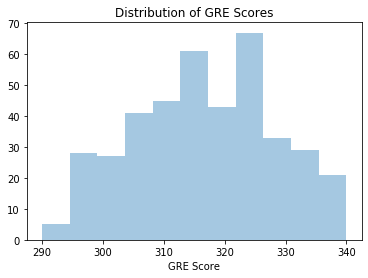

In [6]:
fig = sns.distplot(data['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

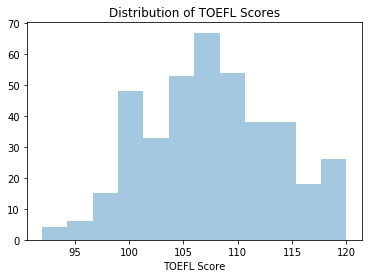

In [7]:
fig = sns.distplot(data['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

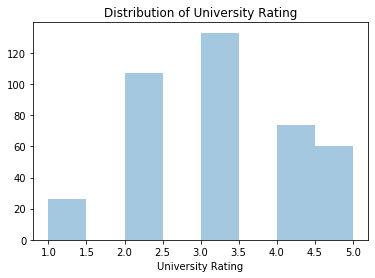

In [8]:
fig = sns.distplot(data['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

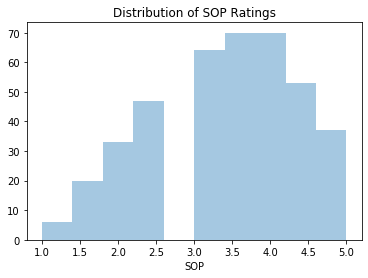

In [9]:
fig = sns.distplot(data['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

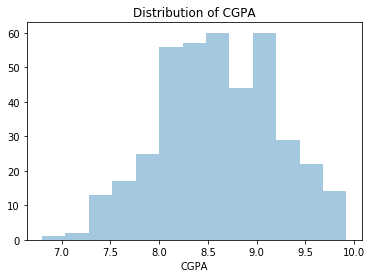

In [10]:
fig = sns.distplot(data['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

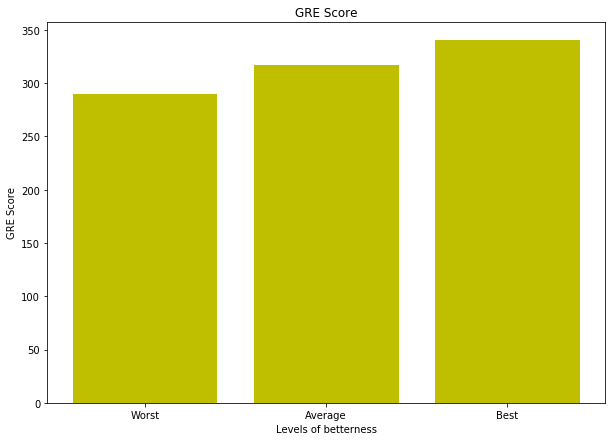

In [18]:
y = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
x = ["Worst","Average","Best"]
plt.figure(figsize = (10,7))
plt.bar(x,y,color = 'y')
plt.title("GRE Score")
plt.xlabel("Levels of betterness")
plt.ylabel("GRE Score")
plt.show()

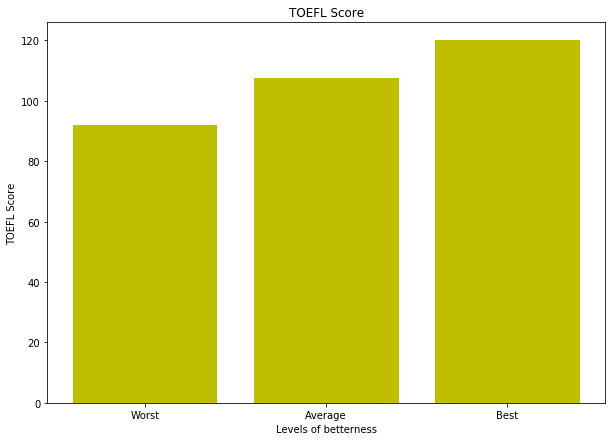

In [19]:
y = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.figure(figsize = (10,7))
plt.bar(x,y,color = 'y')
plt.title("TOEFL Score")
plt.xlabel("Levels of betterness")
plt.ylabel("TOEFL Score")
plt.show()

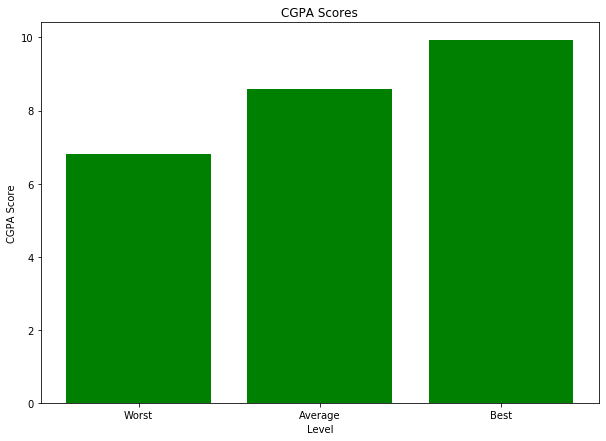

In [21]:
y = np.array([data["CGPA"].min(),data["CGPA"].mean(),data["CGPA"].max()])
x = ["Worst","Average","Best"]
plt.figure(figsize = (10,7))
plt.bar(x,y,color = 'g')
plt.title("CGPA Scores")
plt.xlabel("Level")
plt.ylabel("CGPA Score")
plt.show()

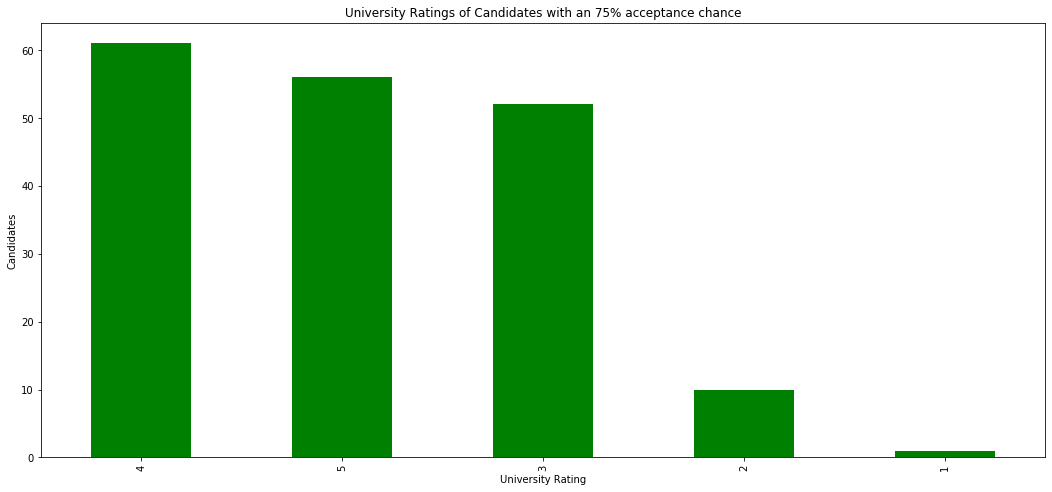

In [13]:
s = data[data["Chance of Admit "] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(18, 8),color = 'g')
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

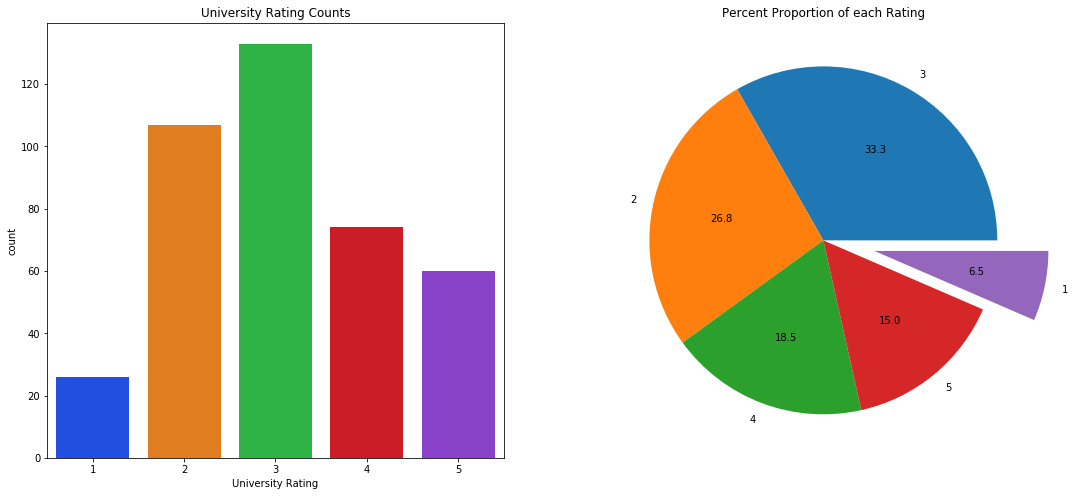

In [22]:
f, ax  = plt.subplots(1,2,figsize = (18,8))

sns.countplot(data['University Rating'],ax = ax[0],palette = 'bright')
ax[0].set_title('University Rating Counts')

ax[1].pie(data['University Rating'].value_counts(),
          labels = data['University Rating'].value_counts().index,autopct = '%1.1f',
         explode = [0,0,0,0,0.3])
ax[1].set_title('Percent Proportion of each Rating')            
plt.show()

# Checking for Outliers

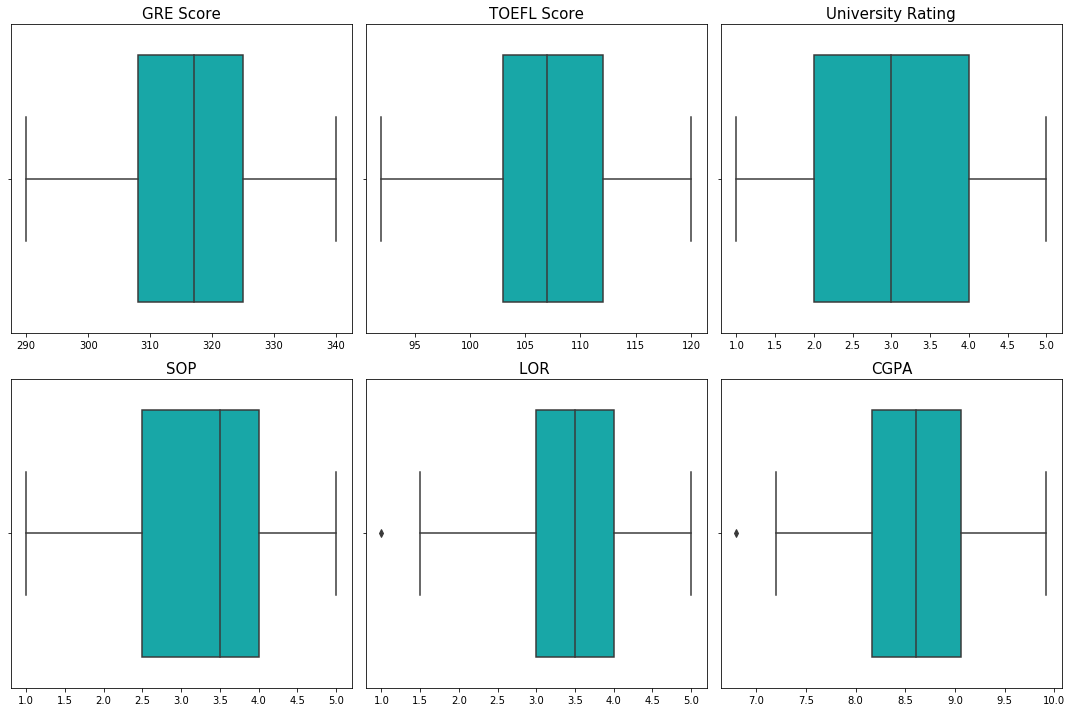

In [25]:
num_cols = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA']
fig, ax  = plt.subplots(2,3,figsize = (10,5))
count = 0
for i in range(2):
    for j in range(3):
        s = num_cols[count+j]
        sns.boxplot(data[s].values,ax = ax[i][j],color = 'c')
        ax[i][j].set_title(s,fontsize = 15)
        fig = plt.gcf()
        fig.set_size_inches(15,10)
        plt.tight_layout()
    count = count+j+1 

# Plotting Pairplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


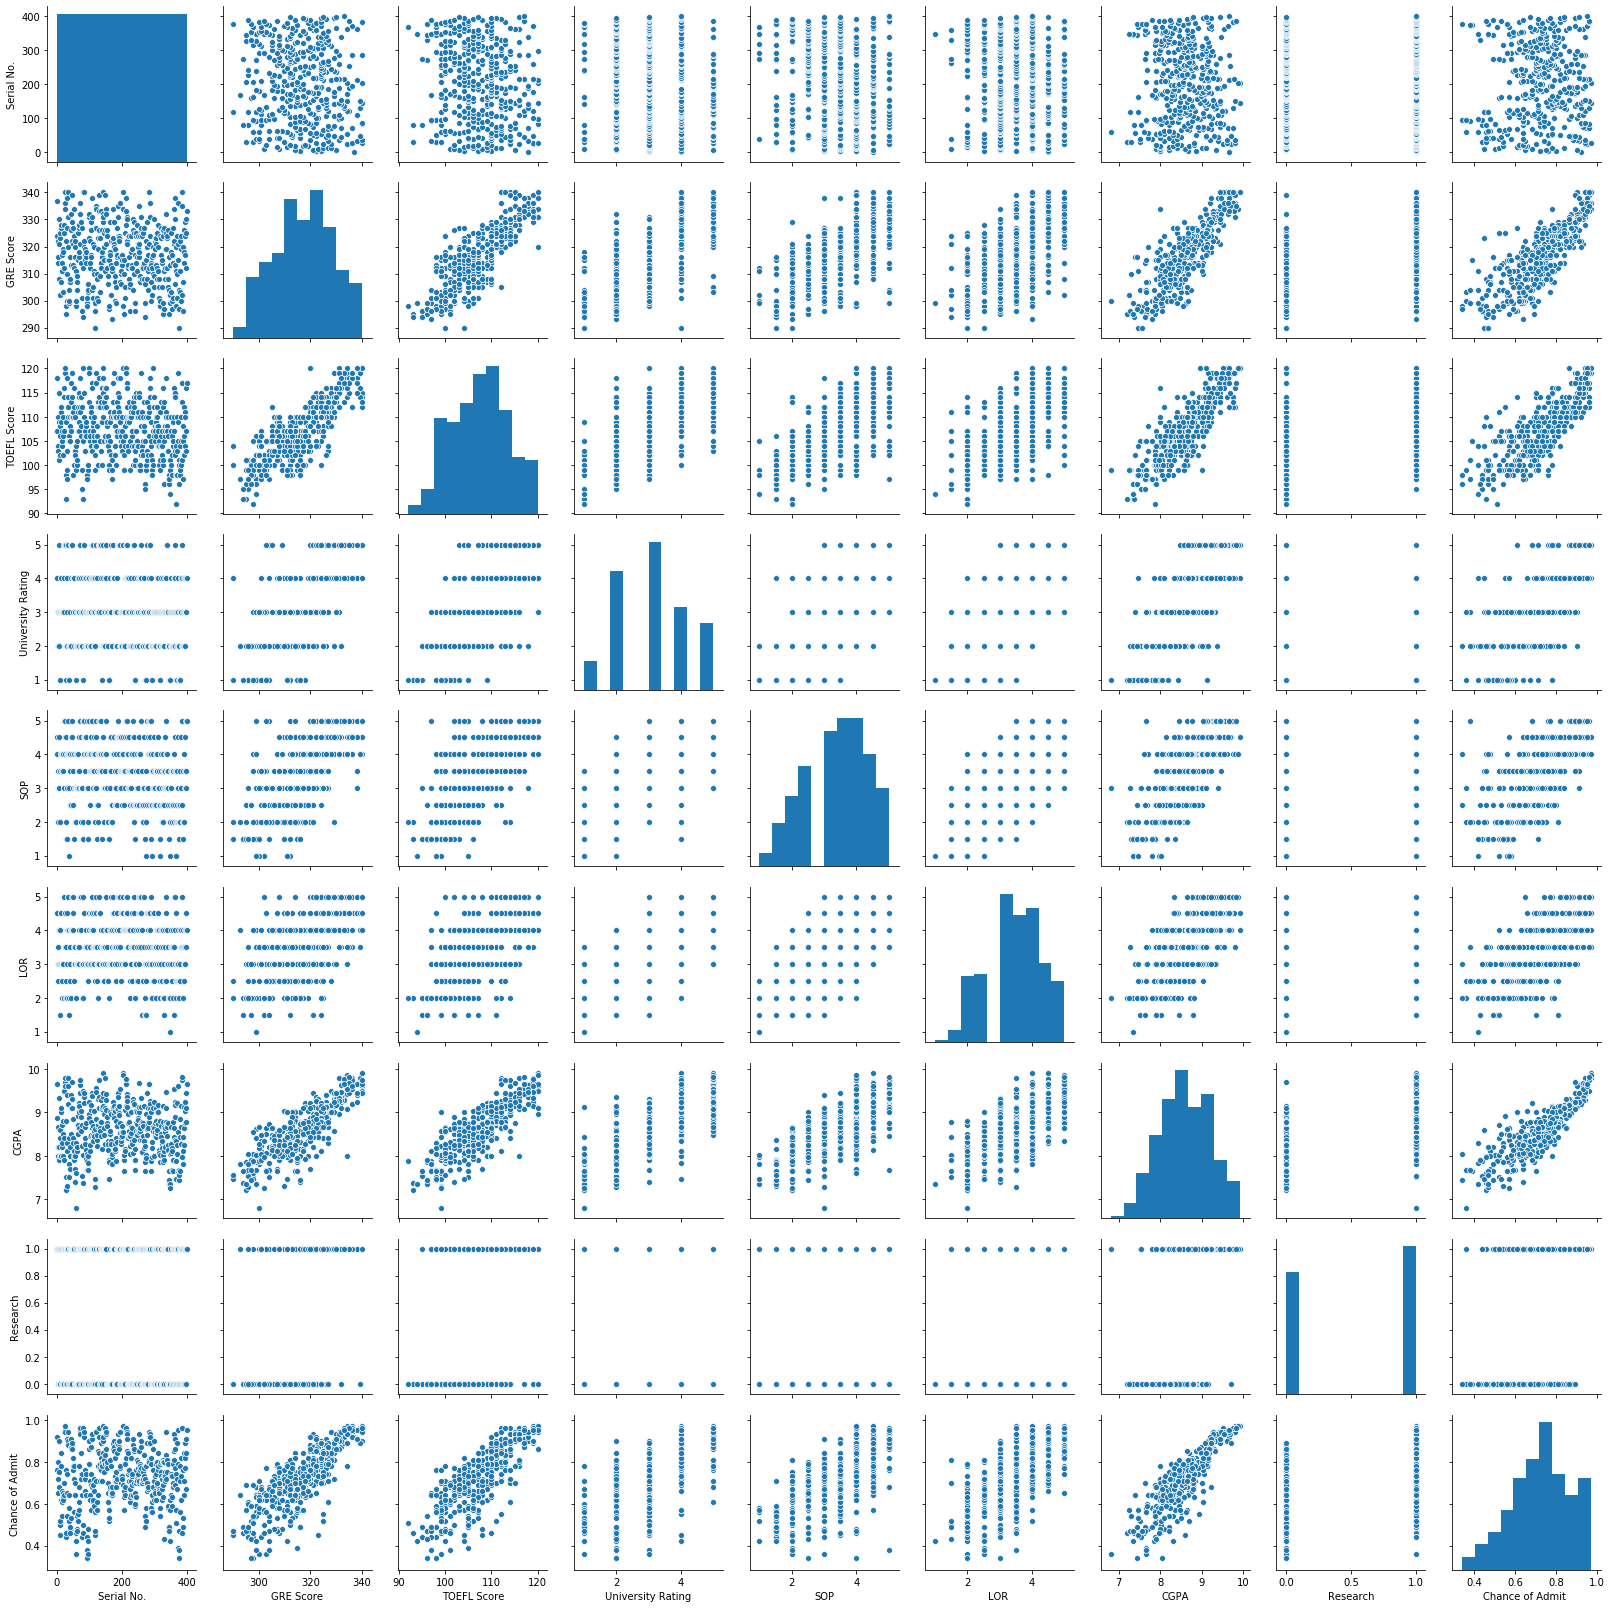

In [26]:
sns.pairplot(data, size=2.5)

# Plotting RegressionPlot

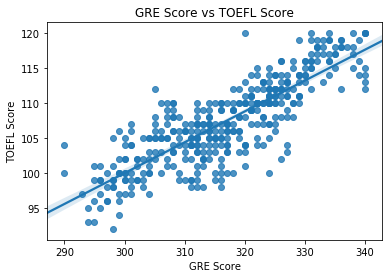

In [27]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=data)
plt.title("GRE Score vs TOEFL Score")
plt.show()

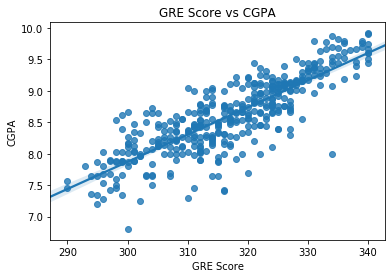

In [28]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

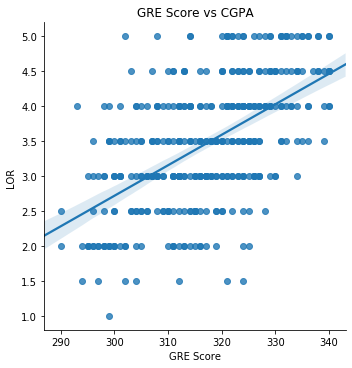

In [29]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

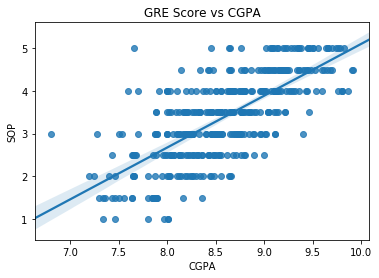

In [30]:
fig = sns.regplot(x="CGPA", y="SOP", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

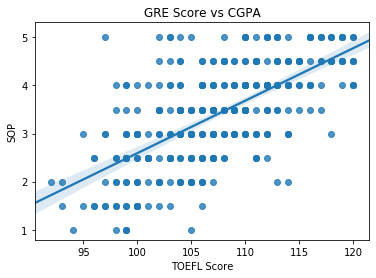

In [31]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

# Heatmap

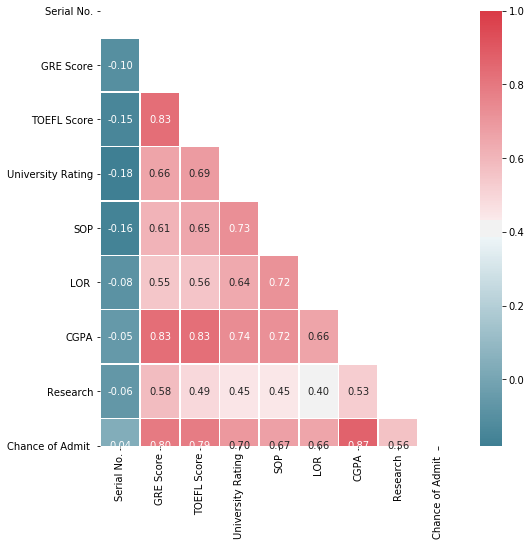

In [39]:
import numpy as np
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

# Traeting Outliers

In [40]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


dev=remove_outlier(data,'LOR ')
dev=remove_outlier(dev,'CGPA')

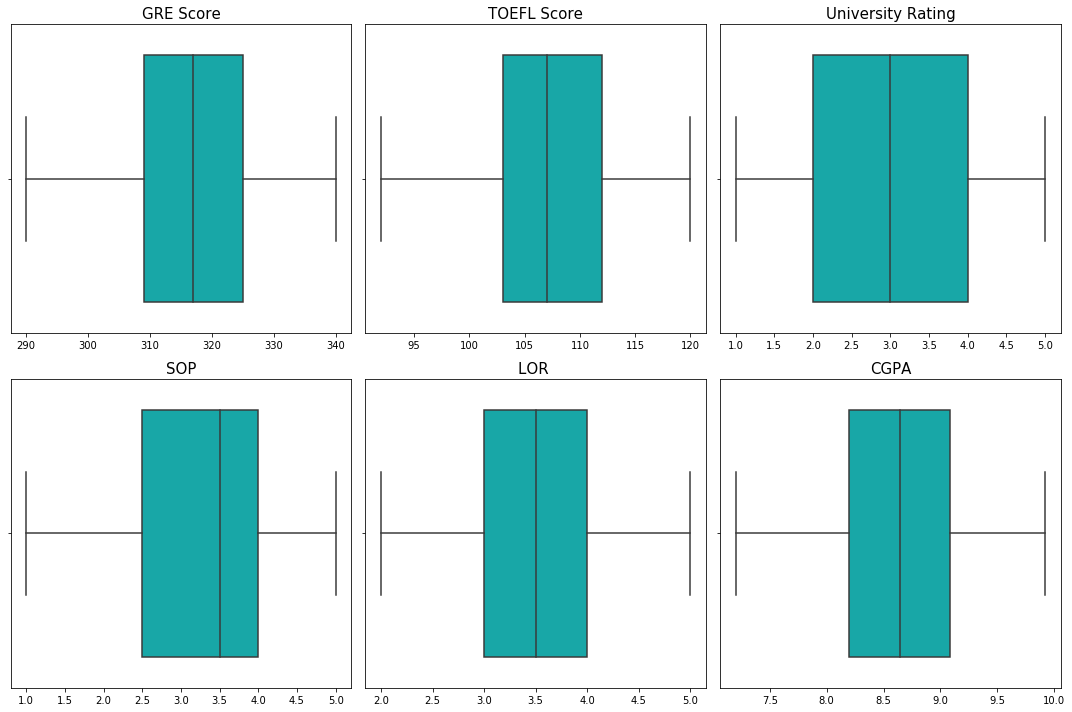

In [41]:
num_cols = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA']
fig, ax  = plt.subplots(2,3,figsize = (10,5))
count = 0
for i in range(2):
    for j in range(3):
        s = num_cols[count+j]
        sns.boxplot(dev[s].values,ax = ax[i][j],color = 'c')
        ax[i][j].set_title(s,fontsize = 15)
        fig = plt.gcf()
        fig.set_size_inches(15,10)
        plt.tight_layout()
    count = count+j+1 

In [42]:
data = dev

In [43]:
from sklearn.preprocessing import StandardScaler
scaled_features = data.copy()
col_names = ['GRE Score', 'TOEFL Score']

In [44]:
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [45]:
scaled_features[col_names] = features
scaled_features.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split
X = scaled_features.drop(['Chance of Admit ','Serial No.'], axis=1)
y = scaled_features['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# DecisionTreeRegressor

In [48]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("DecisionTreeRegressor", (np.sqrt(mean_squared_error(y_test, predictions))))
print("R-score of DecisionTreeRegressor: ", r2_score(y_test,predictions))

DecisionTreeRegressor 0.09282486572143551
R-score of DecisionTreeRegressor:  0.5792631689306655


# Actual vs Predicted Plot

Text(0.5, 0.98, 'Actual vs Predicted')

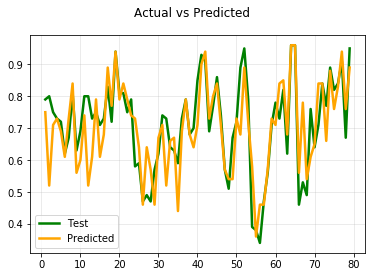

In [50]:
fig = plt.figure()
c = [i for i in range(1,80,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,predictions, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

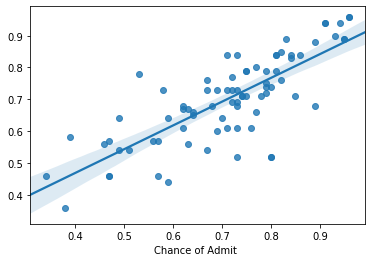

In [51]:
sns.regplot(y_test,predictions)

# RandomForestRegressor

In [52]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("RandomForestRegressor", (np.sqrt(mean_squared_error(y_test, predictions))))
print("R-score of RandomForestRegressor: ",r2_score(y_test,predictions))

RandomForestRegressor 0.06546522315732199
R-score of RandomForestRegressor:  0.790731829512363


Text(0.5, 0.98, 'Actual vs Predicted')

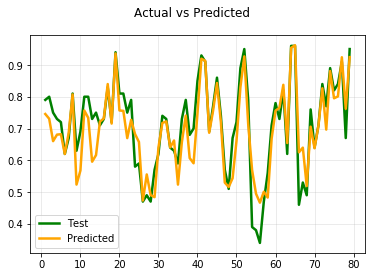

In [54]:
fig = plt.figure()
c = [i for i in range(1,80,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,predictions, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

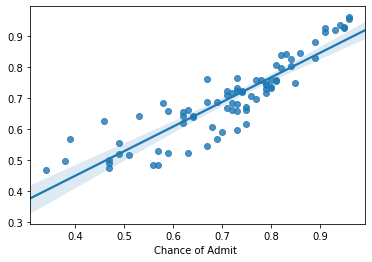

In [55]:
sns.regplot(y_test,predictions)

# KNeighborsRegressor

In [56]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("KNeighborsRegressor", (np.sqrt(mean_squared_error(y_test, predictions))))
print("R-score of KNeighborsRegressor: ",r2_score(y_test,predictions))

KNeighborsRegressor 0.07679695405352177
R-score of KNeighborsRegressor:  0.7120150032625994


Text(0.5, 0.98, 'Actual vs Predicted')

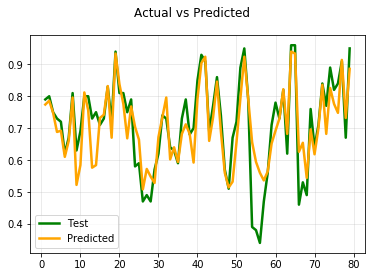

In [57]:
fig = plt.figure()
c = [i for i in range(1,80,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,predictions, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

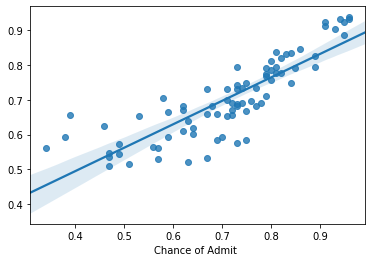

In [58]:
sns.regplot(y_test,predictions)

# SVR

In [59]:
model = SVR()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("SVR", (np.sqrt(mean_squared_error(y_test, predictions))))
print("R-score of SVR: ",r2_score(y_test,predictions))

SVR 0.07826041422054376
R-score of SVR:  0.7009346096819118


Text(0.5, 0.98, 'Actual vs Predicted')

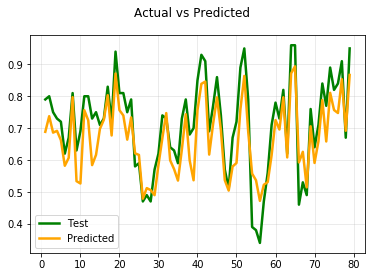

In [60]:
fig = plt.figure()
c = [i for i in range(1,80,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,predictions, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

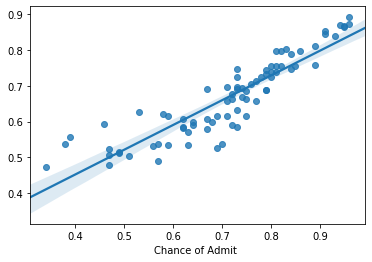

In [61]:
sns.regplot(y_test,predictions)

# LinearRegression

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("LinearRegression", (np.sqrt(mean_squared_error(y_test, predictions))))
print("R-score of LinearRegression: ",r2_score(y_test,predictions))

LinearRegression 0.06195312736894941
R-score of LinearRegression:  0.8125832766156846


Text(0.5, 0.98, 'Actual vs Predicted')

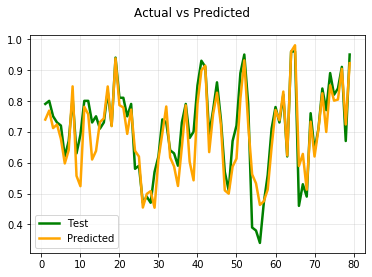

In [64]:
fig = plt.figure()
c = [i for i in range(1,80,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,predictions, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

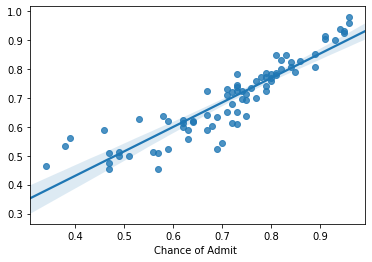

In [65]:
sns.regplot(y_test,predictions)

# AdaBoostRegressor

In [66]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("AdaBoostRegressor", (np.sqrt(mean_squared_error(y_test, predictions))))
print("R-score of AdaBoostRegressor: ",r2_score(y_test,predictions))

AdaBoostRegressor 0.07620169933154512
R-score of AdaBoostRegressor:  0.7164620565132602


Text(0.5, 0.98, 'Actual vs Predicted')

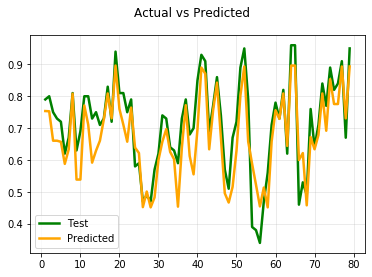

In [68]:
fig = plt.figure()
c = [i for i in range(1,80,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,predictions, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

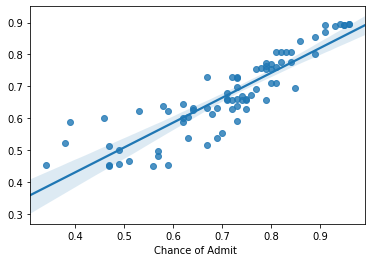

In [69]:
sns.regplot(y_test,predictions)

# Lasso

In [70]:
model = Lasso()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Lasso", (np.sqrt(mean_squared_error(y_test, predictions))))
print("R-score of Lasso: ",r2_score(y_test,predictions))

Lasso 0.14465585218528546
R-score of Lasso:  -0.021771743866599857


Text(0.5, 0.98, 'Actual vs Predicted')

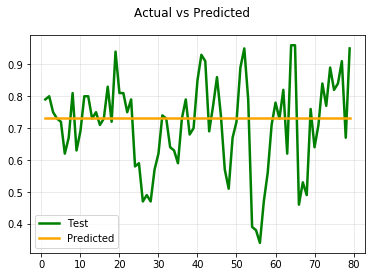

In [71]:
fig = plt.figure()
c = [i for i in range(1,80,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,predictions, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

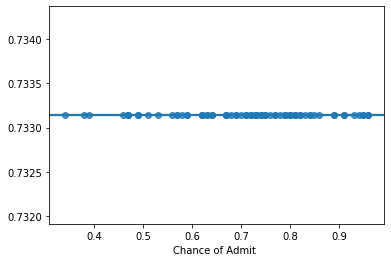

In [72]:
sns.regplot(y_test,predictions)

# Ridge

In [73]:
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Ridge", (np.sqrt(mean_squared_error(y_test, predictions))))
print("R-score of Ridge: ",r2_score(y_test,predictions))

Ridge 0.06201725936372861
R-score of Ridge:  0.8121950595909937


Text(0.5, 0.98, 'Actual vs Predicted')

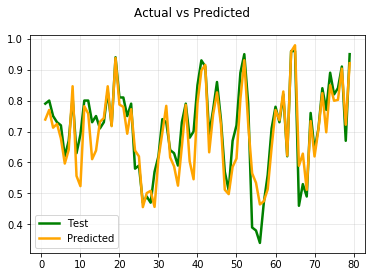

In [74]:
fig = plt.figure()
c = [i for i in range(1,80,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,predictions, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

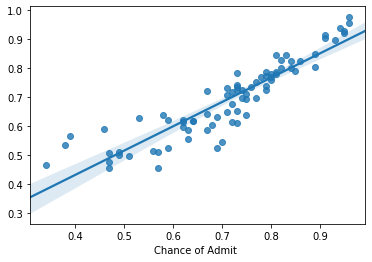

In [75]:
sns.regplot(y_test,predictions)

# Important Features

In [76]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

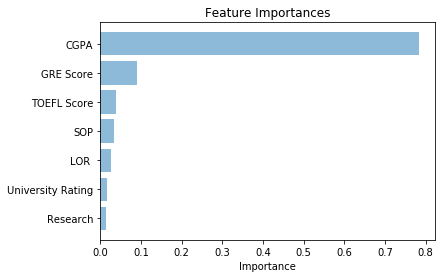

In [77]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()
